___
# Simulação de $\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}$ e $\frac{\bar{X}-\mu}{S/\sqrt{n}}$ quando X~Normal
___

## Aula 23


1. Simulação da padronização de $\bar{X}$ assumindo $\sigma$ conhecido e não conhecido

___

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from scipy.stats import norm, t
%matplotlib inline

___
## Distribuição da Média Amostral a partir de X com distribuição Normal

In [3]:
#População
data = norm.rvs(20,4, size=1000000)
mu=np.mean(data)
sigma=np.var(data)**0.5

X segue uma distribuição Normal
Média de X ==> Valor de mu =  20.008
Variância de X ==> Valor de sigma2 = : 15.993
--------------------


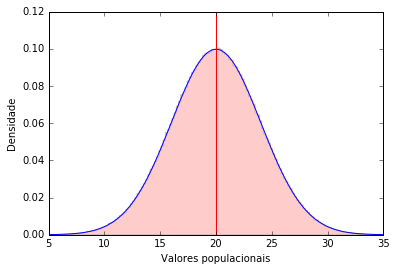

In [4]:
x = np.arange(0,40,0.2)
y = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x,y)
plt.axvline(mu, color='r')

plt.hist(data, bins=200, normed=True, histtype='stepfilled', alpha=0.2, color='r')
plt.xlabel('Valores populacionais')
plt.ylabel('Densidade')
plt.xlim(5,35)

print('X segue uma distribuição Normal')
print('Média de X ==> Valor de mu = ', "%6.3f"%mu)
print('Variância de X ==> Valor de sigma2 = :', "%6.3f"%sigma**2)
print ('-' * 20)

### **Construção da distribuição de $ Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}$ alterando tamanho amostral n**

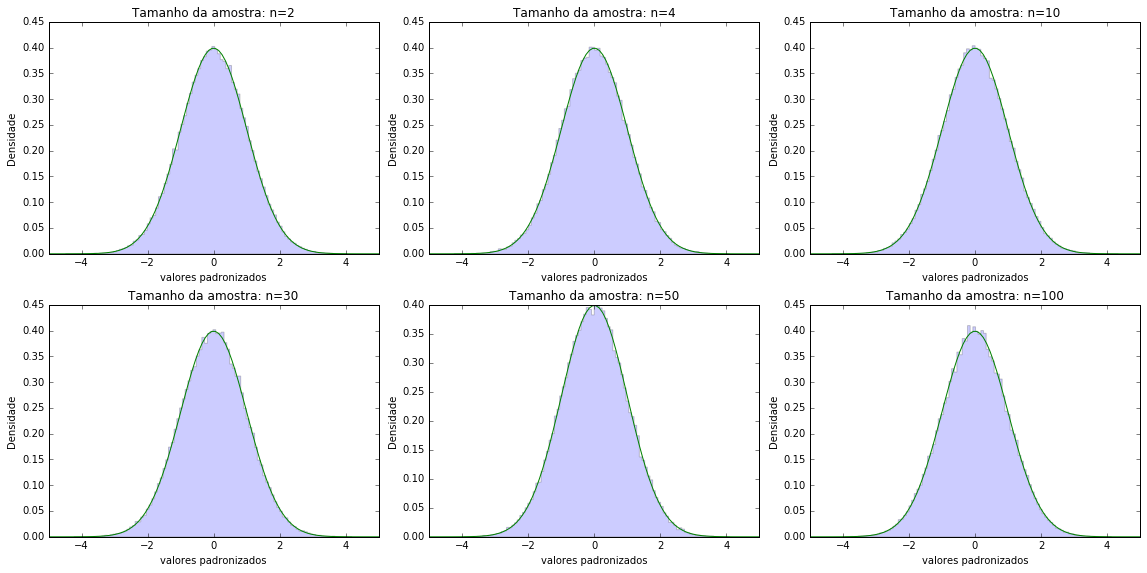

In [5]:
f, axarr = plt.subplots(2,3,figsize=(16,8))
i=0
j=0
for n in [2, 4, 10, 30, 50, 100]:
    if (n==30):
        i=1
        j=0
        
    sampling = np.random.choice(data,size=(100000,n))
    mean_of_sample = np.mean(sampling,1)
    
    #Construção do histograma com todas as médias padronizadas com o verdadeiro desvio padrão (=sigma)
    Z = (mean_of_sample - mu)/(sigma/(n)**0.5)
    axarr[i,j].hist(Z, bins=100, normed=True, histtype='stepfilled', alpha=0.2)
    
    #Construção da curva Normal Padrão
    x = np.linspace(-5,5,100)
    y = norm.pdf(x)
    axarr[i,j].plot(x,y,'g')
    
    axarr[i,j].set_title('Tamanho da amostra: n='+str(n))
    axarr[i,j].set_xlabel('valores padronizados')
    axarr[i,j].set_ylabel('Densidade')
    axarr[i,j].set_xlim(-5,5)
    #ax.set_ylim(0,.30)

    j+=1
        
plt.tight_layout(1)

### **Construção da distribuição de $t=\frac{\bar{X}-\mu}{S/\sqrt{n}}$ alterando tamanho amostral n**

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

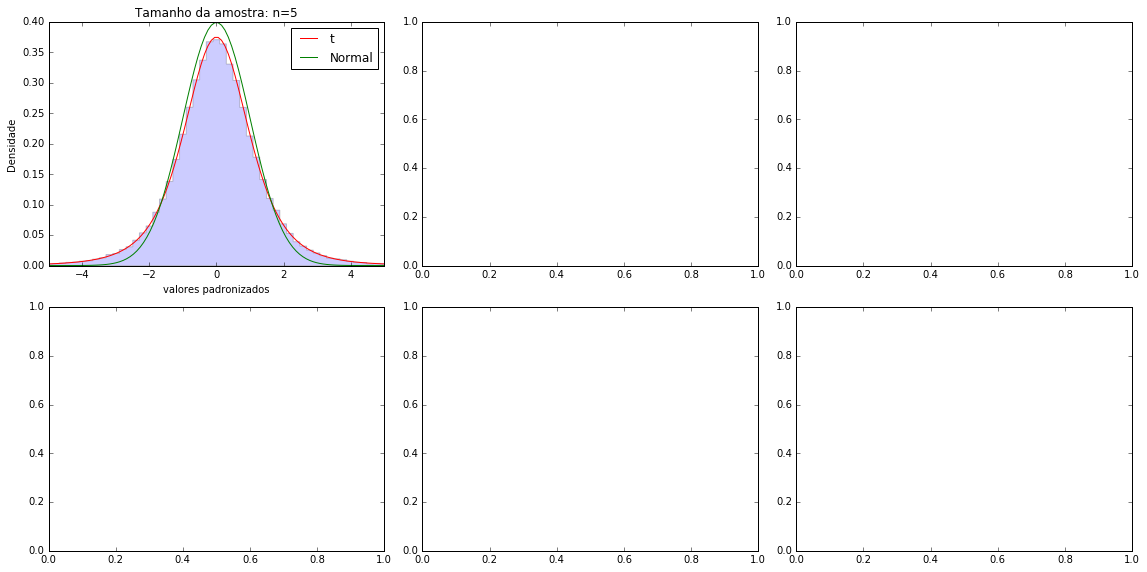

In [7]:
f, axarr = plt.subplots(2,3,figsize=(16,8))
i=0
j=0
for n in [5]:
    if (n==25):
        i=1
        j=0
        
    sampling = np.random.choice(data,size=(100000,n))
    mean_of_sample = np.mean(sampling,1)
    dp_of_sample = np.std(sampling,axis=1,ddof=1)
    
    #Construção do histograma com todas as médias padronizadas com o desvio padrão amostral
    T=(mean_of_sample - mu)/(dp_of_sample/(n)**0.5)
    axarr[i,j].hist(T, bins=300, normed=True, histtype='stepfilled', alpha=0.2)
    
    #Construção da curva da t-student com (n-1) graus de liberdade
    x = np.linspace(-5,5,100)
    print(x)
    y = t.pdf(x, df=(n-1))
    axarr[i,j].plot(x,y,'r')
    
    #Construção da curva Normal Padrão
    y = norm.pdf(x)
    axarr[i,j].plot(x,y,'g')
    
    axarr[i,j].set_title('Tamanho da amostra: n='+str(n))
    axarr[i,j].set_xlabel('valores padronizados')
    axarr[i,j].set_ylabel('Densidade')
    axarr[i,j].set_xlim(-5,5)
    axarr[i,j].legend(("t","Normal"))

    j+=1
        
plt.tight_layout(1)

# Importantíssimo:

1. A padronização $t=\frac{\bar{X}-\mu}{S/\sqrt{n}}$ apenas tem distribuição *t-student* com $n-1$ graus de liberdade se a variável de interesse X segue uma distribuição Normal exata.
    1. **Curisidade:** Faça a simulação acima considerando a distribuição da variável X que assumiu no seu MiniProjeto2. Se a distribuição de X for muito distinta de uma distribuição simétrica, verá facilmente que a padronização de $\bar{X}$ utilizando o desvio padrão amostral não se encaixará em uma distribuição *t-Student*.
    
2. Para estimar a variância populacional $\sigma^2$, utilizamos a variância amostral dada por $S^2=\frac{1}{n-1}\sum^n_{i=1}(x_i-\bar{x})^2$. Note que essa variância divide por $n-1$ e não por $n$. 
    1. Para melhor compreensão desse novo estimador, **leia Magalhãoes e Lima, 7a. edição - Capítulo 7 - Exemplo 7.10 descrito na pág. 231**.